# Micro Credit Defaulter Project

### Problem Statement :
This project includes the real time problem for Micro Finance Institution (MFI) who offers financial services to lower income populations. MFI provides Micro Credit Loan on their mobile balance whihc needs to be paid back in 5 days.

The Consumer is believed to be defaulter if he do not pay back the loaned amount within the time duration i.e. 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

### Data :
    
The dataset was provided by the client

In [187]:
# Let's load the necessary libraries

# Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings for a clean notebook
import warnings
warnings.filterwarnings('ignore')



In [188]:
# Let's load the Micro Credit Defaulter Data Set

credit=pd.read_csv('micro_credit.csv')


In [189]:
# Let's check the Data Set
credit.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


From the above table we can observe that "Unnamed:0" column is just the sl no column. So, we can drop this column.

## Label Description

**label:** Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

**msisdn:** mobile number of user

**aon:** age on cellular network in days

**daily_decr30:** Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

**daily_decr90:** Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

**rental30:** Average main account balance over last 30 days

**rental90:** Average main account balance over last 90 days

**last_rech_date_ma:** Number of days till last recharge of main account

**last_rech_date_da:** Number of days till last recharge of data account

**last_rech_amt_ma:** Amount of last recharge of main account (in Indonesian Rupiah)

**cnt_ma_rech30:** Number of times main account got recharged in last 30 days

**fr_ma_rech30:** Frequency of main account recharged in last 30 days

**sumamnt_ma_rech30:** Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

**medianamnt_ma_rech30:** Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

**medianmarechprebal30:** Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

**cnt_ma_rech90:** Number of times main account got recharged in last 90 days

**fr_ma_rech90:** Frequency of main account recharged in last 90 days

**sumamnt_ma_rech90:** Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

**medianamnt_ma_rech90:** Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

**medianmarechprebal90:** Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

**cnt_da_rech30:** Number of times data account got recharged in last 30 days

**fr_da_rech30:** Frequency of data account recharged in last 30 days

**cnt_da_rech90:** Number of times data account got recharged in last 90 days

**fr_da_rech90:** Frequency of data account recharged in last 90 days

**cnt_loans30:** Number of loans taken by user in last 30 days

**amnt_loans30:** Total amount of loans taken by user in last 30 days

**maxamnt_loans30:** maximum amount of loan taken by the user in last 30 days

**medianamnt_loans30:** Median of amounts of loan taken by the user in last 30 days

**cnt_loans90:** Number of loans taken by user in last 90 days

**amnt_loans90:** Total amount of loans taken by user in last 90 days

**maxamnt_loans90:** maximum amount of loan taken by the user in last 90 days

**medianamnt_loans90:** Median of amounts of loan taken by the user in last 90 days

**payback30:** Average payback time in days over last 30 days

**payback90:** Average payback time in days over last 90 days

**pcircle:** telecom circle

**pdate:** date

In [190]:
# Let's drop the unnecessary column

credit.drop('Unnamed: 0',axis=1,inplace=True)

In [191]:
# Let's check the shape

credit.shape

(209593, 36)

We have 209593 rows and 36 columns in our dataset

In [192]:
# Let's check the columns names

credit.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [193]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

We can observe from the above output that we have 3 types of dataypes in our dataset i.e. Int, object and float

In [194]:
#Let's check the statistic matrix

credit.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


#### Observations:
    1- We can observe that some of the dataset features are ordinal or binary, whereas other features are continous.
    2- We can observe that some columns have negative values like rental30 and renatal90 given our data these values can be negative, wherer as some other columns like aon, daily_decr30, daily_decr90, last_rech_date_ma, last_rech_date_da these columns can not have negative values as these values do not make any sence in ourdataset.

In [195]:
# Let's check the negative values present in our dataset

(credit.drop(['pdate','pcircle','msisdn'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

We can observe from the above output that 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'medianmarechprebal30', 'medianmarechprebal90' columns have negative values in them.

But as per the caolumn lable only 'rental30' & 'rental90' column negative value is justifiable rest negative values are outlier. 

So, we are going to drop those rows where we have negative values.

## Data Pre-Processing

In [196]:
# We will now drop the 'rental30' & 'rental90' from our dataset so that those columns values will not be effected when we drop the negative value rows

credit.drop(['rental30', 'rental90', 'pcircle', 'pdate', 'msisdn'],axis=1, inplace=True)

In [197]:
# Let's remove the negative values rows from our dataset

# Code Reference link(https://www.xspcredit.com/resolution/54296999.html)

from nltk import flatten
index=[]
for cols in credit.columns.values:
    data1=credit[credit[f'{cols}'] < 0].index.values
    data2=data1.tolist()
    index.append(data2)
dataindex=flatten(index)

In [198]:
#Let's drop the negative values column in the our dataset beacause they they do not add value in our analysis

credit.drop(dataindex,inplace=True)

In [199]:
#Let's check of there are any negative values in the dataset

credit[70:80]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
71,1,1589.0,22.521000,22.521000,4.0,0.0,2320,2,2.0,4040.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0
72,1,138.0,67.679333,67.679333,6.0,0.0,2309,3,7.0,5387.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0
73,1,660.0,1012.166667,1014.600000,19.0,0.0,1539,1,0.0,1539.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
75,1,677.0,107.063000,107.063000,5.0,0.0,4048,2,27.0,5587.0,...,3,18,6.0,0.0,3.0,18,6,0.0,2.5,2.5
76,0,621.0,600.000000,600.000000,0.0,0.0,0,0,0.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
77,1,383.0,1219.782000,1238.740000,22.0,0.0,3178,1,0.0,3178.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
79,1,318.0,21792.240000,21826.800000,2.0,0.0,3178,6,2.0,22547.0,...,5,42,12.0,0.0,6.0,48,12,0.0,4.8,4.8
80,1,1122.0,3391.000000,3567.070000,14.0,0.0,773,1,0.0,773.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
81,1,951.0,1888.532667,1914.940000,9.0,0.0,770,6,4.0,5389.0,...,2,12,6.0,0.0,3.0,18,6,0.0,0.0,6.5
82,1,96.0,79.541667,79.541667,5.0,0.0,5787,3,11.0,9635.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0


We can observe from the above output that row number 74 & 78 is removed from the data which contains negative values

In [200]:
#Let's check the shape of our data set after we have dropped the unnecessary columns which have negative values

credit.shape

(203119, 31)

In [201]:
#Let's check the percentage (%) of data set we have droped from our dataset while removing the negative values

(209593-203119)*100/209593

3.0888436159604566

We can observe that we have removed around 3.088% of data from our dataset. Since our data is expensive so we have to be very carefule with the dataset because we can not loose more that 7 to 8% of data.

Since, we have already removed around 3.1% of data so we have to be extra careful while treating the outlier that we should not further remove data more than 5%.

In [202]:
# Let's re-check the negative values present in our dataset

(credit >= 0).all()

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [203]:
# Let's reload the data set and add the pdate, rental90 and rental30 vlues in our data set
#rental30 and rental90 column contains negative values which are very importnt in our analysis

micro_credit=pd.read_csv('micro_credit.csv')
print('Micro Credit Defaulter Data Set Re-Loaded Sucessfully')

Micro Credit Defaulter Data Set Re-Loaded Sucessfully


In [204]:
credit['rental30']=micro_credit['rental30']
credit['rental90']=micro_credit['rental90']
credit['pdate']=micro_credit['pdate']

We are now again merging the removed features which are having negative values and are required for the analysis.

In [205]:
# Let's change the Date dtype to datetime series

credit['pdate']=pd.to_datetime(credit['pdate'])

In [206]:
# Lets split the year and month from the Date for better visulatization

credit['Year']=credit['pdate'].dt.year
credit['Month']=credit['pdate'].dt.month
credit.Month = credit.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})
credit['Day']=credit['pdate'].dt.day

In [207]:
# Let's drop the unnecessary column

credit.drop(['pdate','Year'],axis=1,inplace=True)

In [208]:
credit.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Month,Day
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,...,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,JUL,20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,...,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,AUG,10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,...,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,AUG,19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,JUN,6
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,...,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,JUN,22


In [209]:
#Let's check the value counts in each columns

for i in credit.columns:
    print(credit[i].value_counts())
    print('\n')

1    179392
0     23727
Name: label, dtype: int64


95.000000        384
92.000000        352
96.000000        351
99.000000        348
157.000000       344
                ... 
828367.741313      1
2429.000000        1
806204.003398      1
754599.258886      1
839069.358422      1
Name: aon, Length: 4407, dtype: int64


0.000000        4102
500.000000       819
1000.000000      564
700.000000       345
600.000000       344
                ... 
2927.806000        1
24542.310000       1
1767.433333        1
6651.279667        1
8025.668000        1
Name: daily_decr30, Length: 144077, dtype: int64


0.00        4023
500.00       771
1000.00      485
700.00       310
600.00       307
            ... 
2255.20        1
11203.14       1
13146.22       1
4759.00        1
30525.39       1
Name: daily_decr90, Length: 155570, dtype: int64


1.000000         45828
2.000000         26327
3.000000         19715
0.000000         19050
4.000000         15243
                 ...  
926713.453955      

0.00        6047
200.13       889
99.56        723
90.00        673
60.00        672
            ... 
35185.40       1
451.69         1
107.60         1
7155.86        1
1852.14        1
Name: rental90, Length: 138467, dtype: int64


JUL    84605
JUN    78154
AUG    40360
Name: Month, dtype: int64


11    7833
12    7819
10    7814
13    7747
7     7717
6     7692
8     7635
15    7630
14    7614
5     7605
2     7602
1     7535
9     7461
17    7450
16    7387
3     7375
18    7116
4     6849
19    6726
20    6526
21    5791
23    5643
22    5592
27    5128
25    5117
26    5016
24    4949
29    4914
30    4913
28    4764
31    2159
Name: Day, dtype: int64




In [210]:
#Let's check the % of defaulter and non defaluters customers

total_customers = credit.shape[0]
print("Total customers: {}".format(total_customers))
non_defaulter_customers = credit[credit["label"] == 1].shape[0]
print("Non defaulter customer: {}".format(non_defaulter_customers))
defaulter_customers = credit[credit["label"] == 0].shape[0]
print("Defaulter customer : {}".format(defaulter_customers))
non_defaulter_percent = (non_defaulter_customers/total_customers)*100
print("Non Defaulter Customer percentage : {0:.2f}%".format(non_defaulter_percent))
defaulter_percent = (defaulter_customers/total_customers)*100
print("Deafulter Customer : {0:.2f}%".format(defaulter_percent))

Total customers: 203119
Non defaulter customer: 179392
Defaulter customer : 23727
Non Defaulter Customer percentage : 88.32%
Deafulter Customer : 11.68%


We can observe that we have around 88.32% Non Defaulter and 11.68% Defaluter customers in our dataset and from the above result it is very clear that our data is imbalanced.1

## Exploratory Data Anaysis

In [211]:
#Let's confirm that we do not have any null values in our dataset

credit.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
rental30                0
rental90                0
Month                   0
Day                     0
dtype: int64

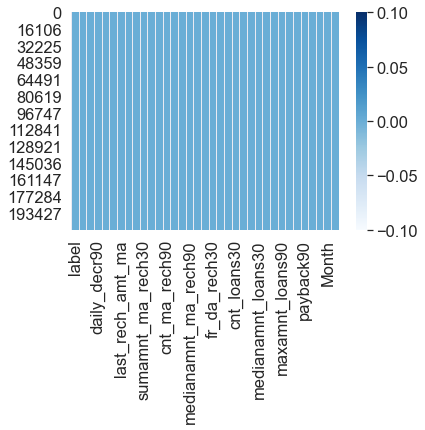

In [212]:
#Let's plot the heat map for null values

sns.heatmap(credit.isnull(),cmap='Blues')
plt.show()

We can observe from the above output and heat map that we do not have any null values in our dataset

In [213]:
#Let's check the statistic matrix

credit.describe().T

,count,mean,std,min,25%,50%,75%,max
label,203119.0,0.883187,0.321198,0.00,1.000000,1.000,1.000000,1.000000
aon,203119.0,8160.657531,75905.229467,1.00,250.000000,530.000,983.000000,999860.755168
daily_decr30,203119.0,5511.941860,9309.431354,0.00,47.631500,1603.126,7448.295000,265926.000000
daily_decr90,203119.0,6231.105509,11027.961422,0.00,47.906667,1640.000,8048.110000,320630.000000
last_rech_date_ma,203119.0,3799.380829,54219.841938,0.00,1.000000,3.000,7.000000,998650.377733
last_rech_date_da,203119.0,3752.767072,53650.829181,0.00,0.000000,0.000,0.000000,999171.809410
last_rech_amt_ma,203119.0,2085.289825,2376.018149,0.00,770.000000,1539.000,2309.000000,55000.000000
cnt_ma_rech30,203119.0,4.047706,4.283372,0.00,1.000000,3.000,6.000000,203.000000
fr_ma_rech30,203119.0,3776.156209,53944.796311,0.00,0.000000,2.000,6.000000,999606.368132
sumamnt_ma_rech30,203119.0,7849.712883,10226.455962,0.00,1546.000000,4717.000,10112.000000,810096.000000


#### Observations:
    1- We can confirm that we do not have any null values in the our dataset.

2- We can observe that all the features have mean greater than median which means our data is positively skewed.

3- Most of the features are having outliers.


In [214]:
#Let's check the correlation with the dependent variable

credit.corr()
credit.corr().style.background_gradient(cmap='coolwarm')

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Day
label,1.000000,-0.003257,0.161804,0.160075,0.003291,0.000777,0.120954,0.226554,0.000269,0.193586,0.130066,-0.003660,0.226713,0.073161,0.197374,0.109699,0.035454,0.003886,-0.000628,0.000457,-0.006770,0.188395,0.189479,0.000591,0.041934,0.005160,0.192480,0.080027,0.033279,0.042385,0.042864,0.053048,0.070185,0.013425
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,0.000421,0.003524,0.004244,-0.002813,0.005023,0.000776,0.003917,-0.000904,0.001694,0.001094,0.001037,0.005448,-0.002216,-0.002162,-0.002675,0.005314,-0.000893,-0.002683,-0.001383,0.003436,0.002303,0.002546,-0.000946,-0.000880,-0.000036
daily_decr30,0.161804,0.000969,1.000000,0.977540,-0.000091,-0.002064,0.275021,0.446659,-0.000877,0.634549,0.295468,-0.001180,0.583609,-0.080244,0.761489,0.257517,0.037038,0.000451,-0.001628,0.038082,0.020153,0.360217,0.466750,0.000184,-0.012161,0.008838,0.559284,0.398443,-0.037608,0.023488,0.043461,0.441569,0.457884,0.004856
daily_decr90,0.160075,0.000218,0.977540,1.000000,0.000346,-0.002327,0.263310,0.421963,-0.000623,0.601720,0.283012,-0.000728,0.589583,-0.081445,0.767461,0.250213,0.035904,0.000385,-0.001658,0.030402,0.015914,0.334496,0.443116,0.000193,-0.006041,0.009320,0.563157,0.395467,-0.034942,0.016062,0.037270,0.434178,0.470832,-0.023529
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,0.001663,-0.001630,0.004292,0.003790,0.000763,0.001790,-0.000812,-0.001030,-0.003495,-0.003622,-0.003602,-0.002451,0.000764,0.000470,0.001046,0.001615,-0.000139,0.000421,-0.001415,0.002580,-0.002574,-0.002084,-0.001351,-0.002128,0.000392
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-0.000206,0.001266,0.003041,0.000761,0.000996,-0.000776,0.000423,0.004235,-0.003657,0.000025,-0.001895,-0.000234,0.000120,0.000155,0.000031,-0.001007,-0.000903,-0.000035,0.001165,-0.003441,-0.000111,0.000304,0.003119,0.002617,0.000996
last_rech_amt_ma,0.120954,0.003507,0.275021,0.263310,-0.000335,0.000086,1.000000,-0.009934,0.002783,0.437552,0.792470,-0.002577,0.010124,0.104564,0.416616,0.816742,0.124778,-0.001666,-0.003547,0.013932,0.015862,-0.034258,0.002538,0.000788,0.027880,0.000020,0.008395,0.147631,0.020702,-0.031179,-0.018116,0.125913,0.119665,0.029866
cnt_ma_rech30,0.226554,-0.003179,0.446659,0.421963,0.003927,0.001216,-0.009934,1.000000,0.001209,0.654083,-0.019300,0.000285,0.885242,-0.159339,0.580163,-0.059099,0.011764,0.002304,-0.002785,0.010665,0.006307,0.763976,0.750294,0.000337,-0.069021,0.014483,0.682555,0.170374,-0.073029,0.038880,0.011622,0.230352,0.226592,0.069411
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,0.000395,-0.000909,0.002800,0.000803,-0.001948,-0.000906,-0.001894,-0.003018,-0.000474,-0.001656,0.001475,-0.001972,0.002444,0.002246,-0.001031,-0.000534,0.003557,0.002458,-0.001883,-0.001517,0.000837,0.000487,-0.001688,-0.000975,0.000972
sumamnt_ma_rech30,0.193586,0.000421,0.634549,0.601720,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000,0.486747,-0.000000,0.593010,-0.075452,0.889206,0.418866,0.088231,0.002526,-0.001742,0.018110,0.016744,0.487372,0.527106,0.001732,-0.035825,0.009307,0.480385,0.255176,-0.043106,-0.004216,-0.017576,0.270852,0.257157,0.056985


### Observations:
1- We can observe that daily_decr30 and daily_decr90 have very high positive correlation with each other.

2- cnt_loan30 and amnt_loan30 also have very high positive correlation with each other.

3- We can also obereve that there are many more features which have positive or negative correaltion with eachother.
So we have to drop those columns to avoid multicollinearity

Text(0.5, 1.0, 'correlation with target variable')

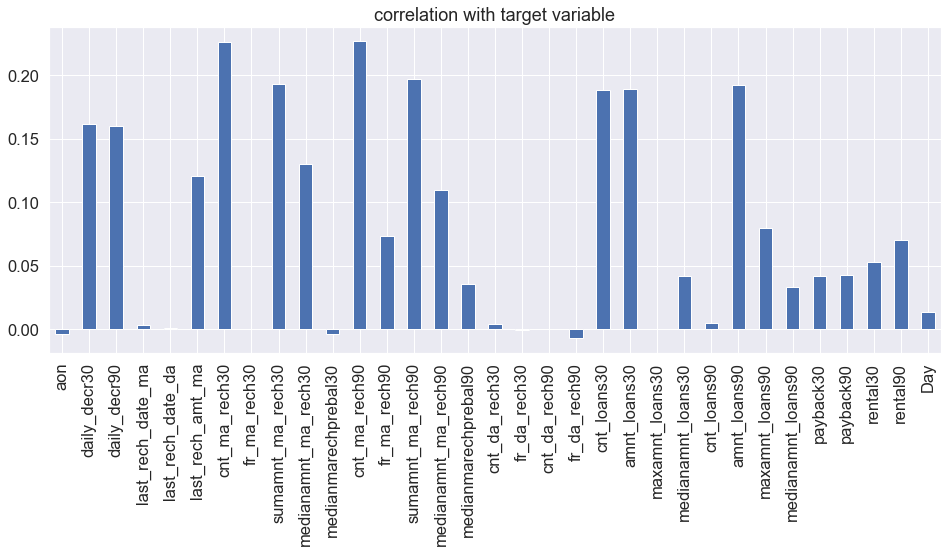

In [215]:
plt.figure(figsize=(16,6))
credit.drop('label',axis=1).corrwith(credit['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('correlation with target variable')

# Observation

1.All features are positively correlated with label,except 'medianmarechprebal30' & 'fr_da_rech90'

2.'cnt_ma_rech30' & 'cnt_ma_rech90' are highly(positively
) correlated with target column

3.'last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','fr_da_rech30','cnt_da_rech90','fr_da_rech90' is very very less correlated with atrget column .ie label

In [216]:
#Let's drop the columns which are highly correlated with each other inorder to avoid multicolinearity problem

credit.drop(columns=["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1, inplace = True)

In [217]:
credit.shape

(203119, 25)

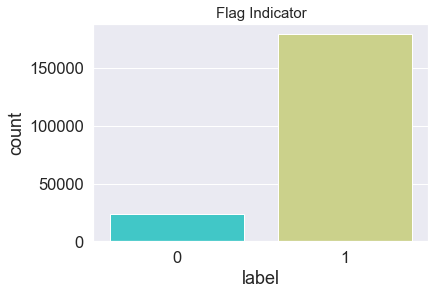

1    179392
0     23727
Name: label, dtype: int64


In [218]:
#Checking the number of Flag Indicator.

sns.countplot(x='label', data=credit, palette='rainbow')
plt.title('Flag Indicator', fontsize=15)
plt.show()

print(credit['label'].value_counts())

Percentage 1    0.883187
0    0.116813
Name: label, dtype: float64


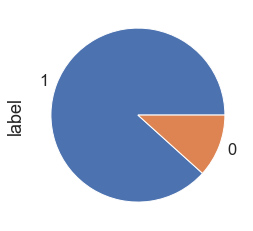

In [219]:
#Let's plot a pie chart for label percentage in dataset

print('Percentage',credit.label.value_counts(normalize=True));
credit.label.value_counts().plot(kind='pie');

#### Observation


1.Out of total ,183431  user paid back the credit amount within 5 days of issuing the loan.

2.Out of total , 26162  user failed to pay back the credit amount within 5 days of issuing the loan.

  We also observe that the data is unbalanced

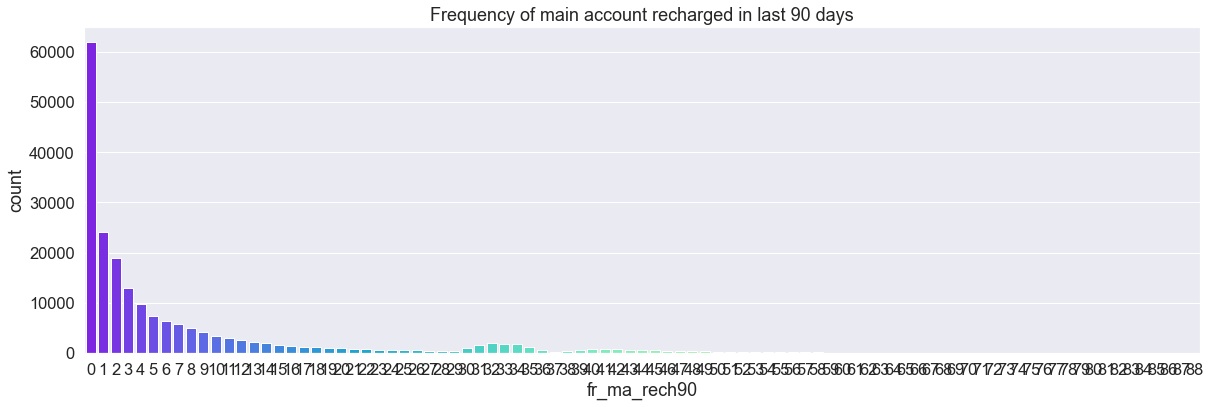

In [220]:
#Checking the Frequency of data account recharged in last 90 days

plt.subplots(figsize=(20,6))
sns.countplot(x='fr_ma_rech90', data=credit, palette='rainbow')
plt.title('Frequency of main account recharged in last 90 days', fontsize=18)
plt.show()



    We notice that main account has been recharged much less frequently

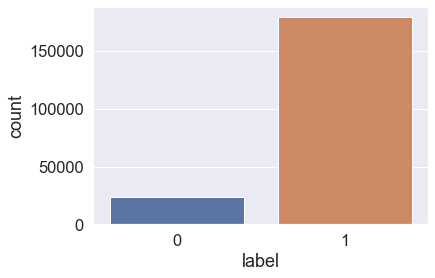

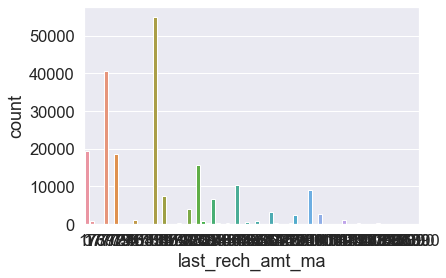

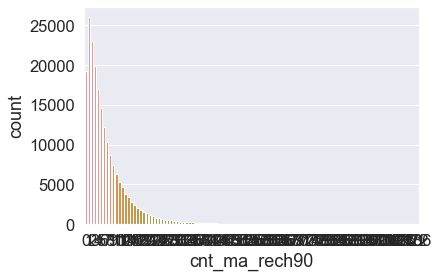

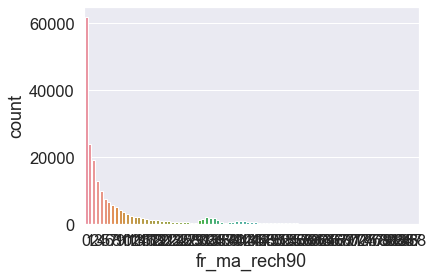

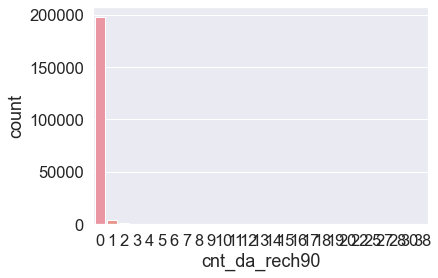

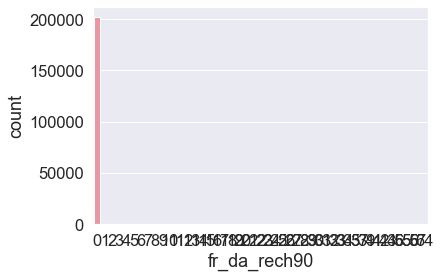

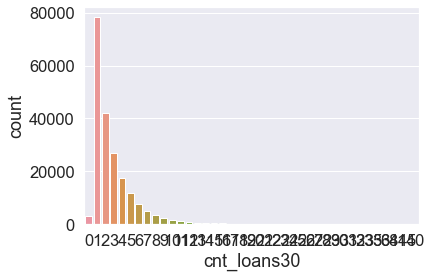

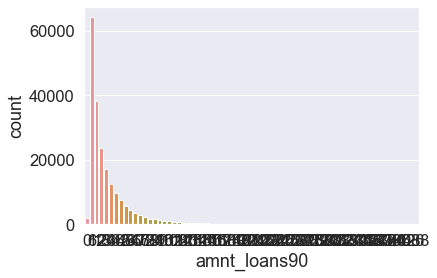

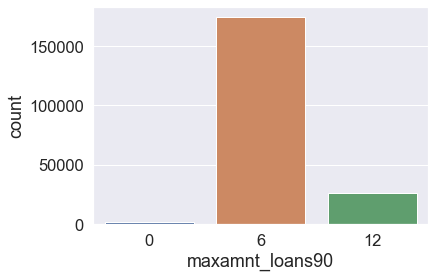

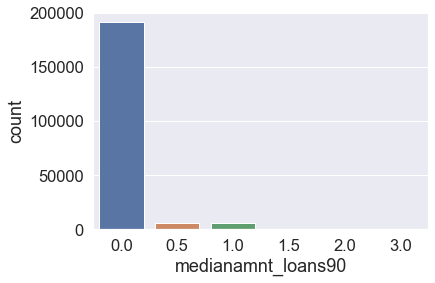

In [221]:
#Lets plot the countplot of list of features 

list=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
      'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]

for i in list:
    plt.subplots(figsize=(6,4))
    sns.countplot(i,data=credit)
    plt.show()

In [ ]:
["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"

In [241]:
list1=[ 'daily_decr90',
        'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90',
        'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'maxamnt_loans30',  'cnt_loans90',
       'amnt_loans90', 'medianamnt_loans90',
       'payback90']

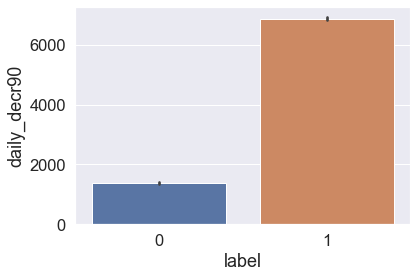

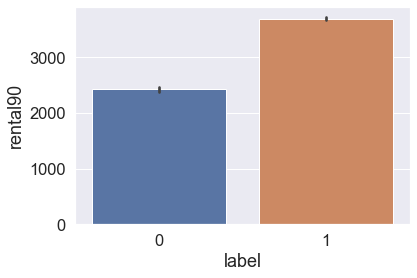

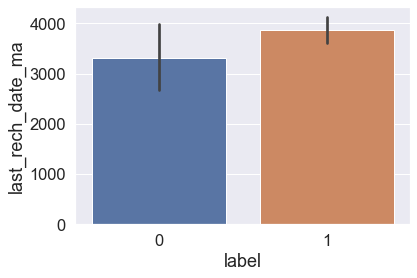

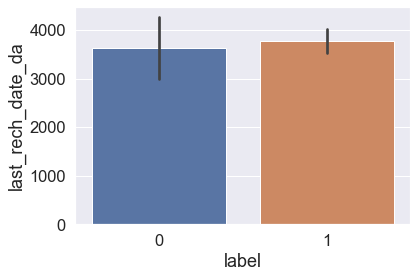

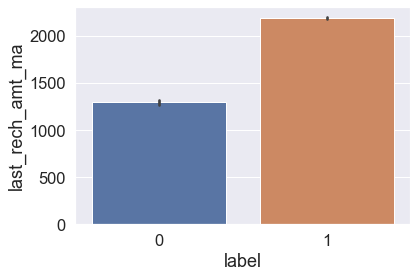

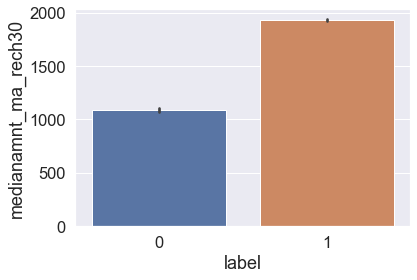

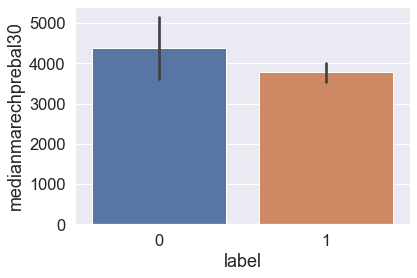

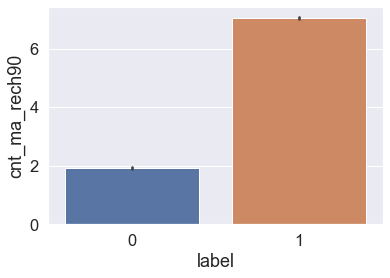

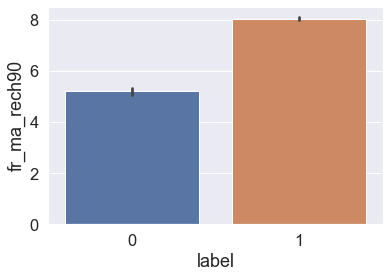

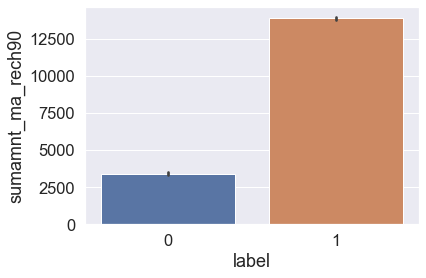

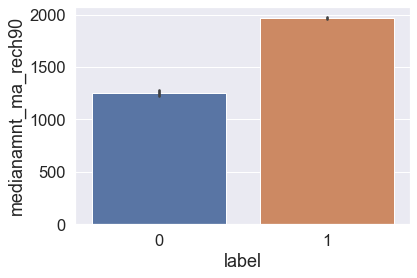

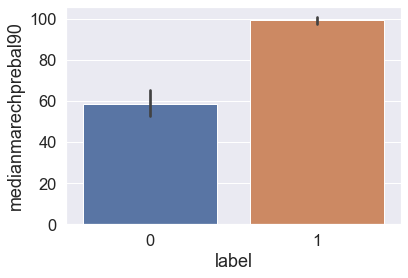

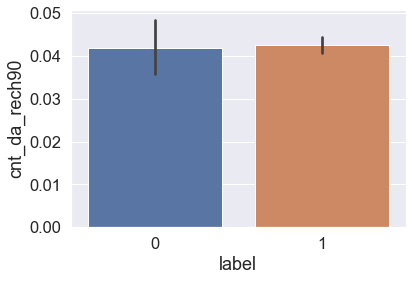

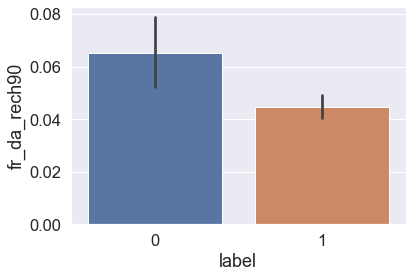

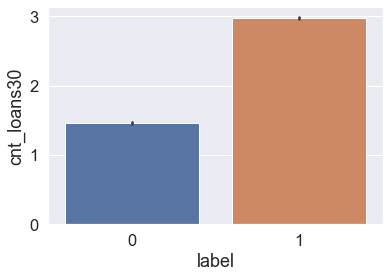

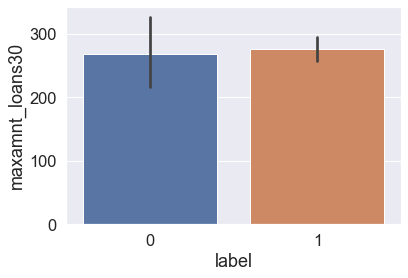

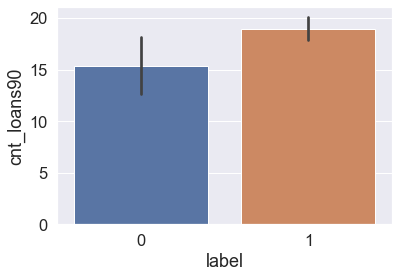

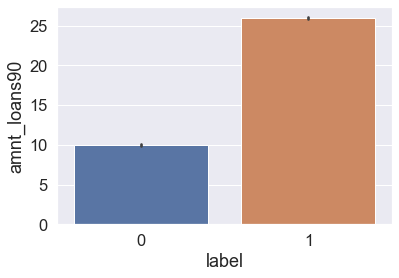

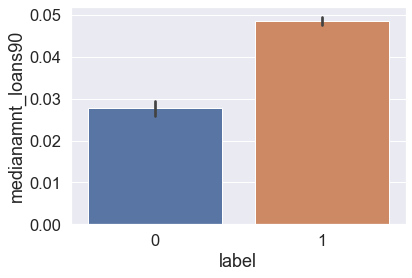

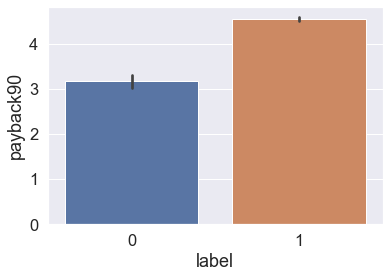

In [242]:
for i in list1:
    plt.subplots(figsize=(6,4))
    sns.barplot(y=credit[i],x='label', data=credit)
    plt.show()


##### From all the bar graph ,we observe that;

The clients who have been repaying their loans spend more per day than those who don't repay their loans
Clients who do repay their debt have a very large spread in their data though.


Those who repay their loan have high average main account balance over last 30 days,than those whose who do not repay their loan

clients who repay their loans also recharged their main accounts most often.

The clients who repay their loans are the ones recharging the mosT

people who are not recharging their balance more frequently are the major defaulters in the paying back


Most of the loans are taken out by clients who repay them.

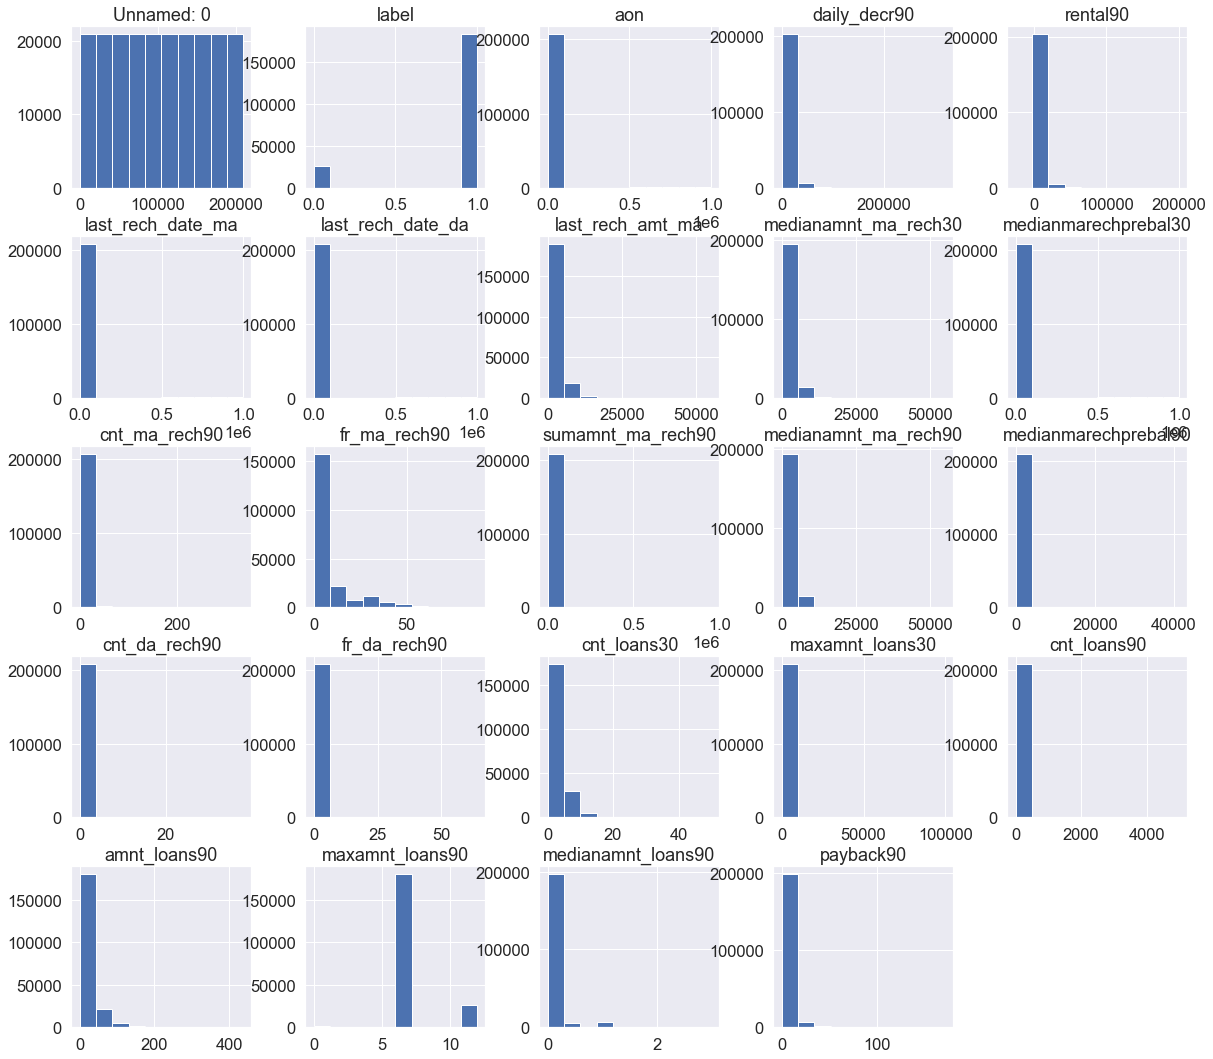

In [167]:
#Let's plot the histogram

credit.hist(figsize=(20,30),layout=(8,5));

* We observe that the data is highly skewed

## Modeling Pre-Processing 

### Plotting Outliers

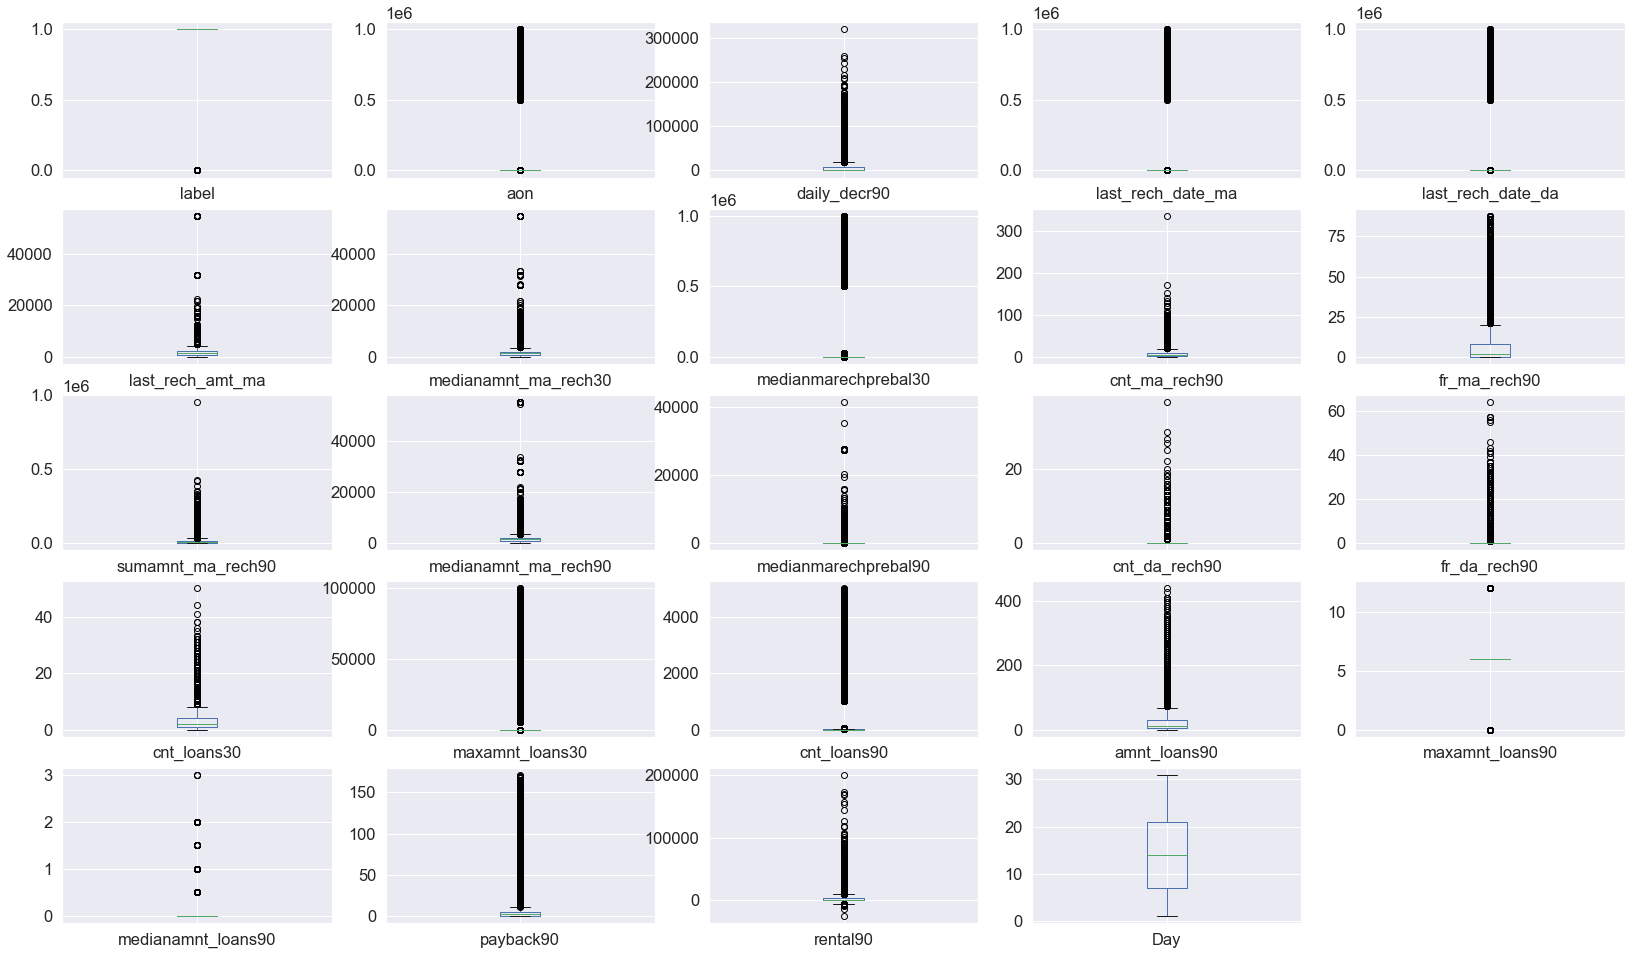

In [248]:
credit.plot(kind='box',subplots=True,layout=(6,5),figsize=(28,20))
plt.show()

The entire dataset is full of outliers. If we build a model without treating them, the entire model will gravitate towards them and the accuracy score will be impacted. Given the cost of our data, we cannot really drop the entire rows filled with outliers because that will result in a data loss. The best way can be to impute the outliers is with median values of the columns. As we have a lot of samples, there will be multiple occurances of various values and hence, median will be our preferred method of imputation. Even if we impute the datta with mean, the data will not be normally distributed. We need to apply cube root to the data as well to achieve a normal distribution.

In [35]:
#Let's encode our dataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(credit.columns)):
    credit[credit.columns[column]]=le.fit_transform(credit[credit.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [36]:
#Let's check and remove for the outliers

#from scipy.stats import zscore
#z_score=abs(zscore(credit))
#print(credit.shape)
#credit_final=credit.loc[(z_score<3).all(axis=1)]
#print(credit_final.shape)

In [37]:
(203119-165525)*100/203119

18.508362093157213

We are not removing the outliers because when we treat the outliers it removes around around 18% of the data. So, we have decided not to remove the outliers

In [38]:
# Let's drop the Month column

credit.drop('Month',axis=1,inplace=True)

In [39]:
#Let's check the skewness of our DataSet

credit.skew()

label                   -2.386004
aon                      1.797454
daily_decr90             0.222363
last_rech_date_ma       16.459771
last_rech_date_da       16.771479
last_rech_amt_ma         1.065276
medianamnt_ma_rech30     2.016432
medianmarechprebal30     0.839888
cnt_ma_rech90            2.871504
fr_ma_rech90             2.277287
sumamnt_ma_rech90        1.701876
medianamnt_ma_rech90     2.073507
medianmarechprebal90     0.768080
cnt_da_rech90           23.366587
fr_da_rech90            26.510118
cnt_loans30              2.659669
maxamnt_loans30         18.299703
cnt_loans90             17.614247
amnt_loans90             3.108780
maxamnt_loans90          1.644090
medianamnt_loans90       4.900072
payback90                0.855109
rental90                 0.446231
Day                      0.195099
dtype: float64

In [40]:
# Let's treat the skewness

for col in credit.columns:
    if credit[col].skew()>0.55:
        credit[col]=np.log1p(credit[col])

In [41]:
#Let's recheck the skewness of our DataSet

credit.skew()

label                   -2.386004
aon                     -0.653636
daily_decr90             0.222363
last_rech_date_ma        0.943342
last_rech_date_da        6.334096
last_rech_amt_ma        -0.813817
medianamnt_ma_rech30    -0.676170
medianmarechprebal30    -1.726480
cnt_ma_rech90           -0.053548
fr_ma_rech90             0.502210
sumamnt_ma_rech90       -0.853914
medianamnt_ma_rech90    -0.828250
medianmarechprebal90    -2.111807
cnt_da_rech90            8.372295
fr_da_rech90            17.796731
cnt_loans30              0.689560
maxamnt_loans30         11.155345
cnt_loans90              1.935929
amnt_loans90             0.720477
maxamnt_loans90          0.527236
medianamnt_loans90       4.184506
payback90               -0.108739
rental90                 0.446231
Day                      0.195099
dtype: float64

In [42]:
#Let's encode our dataset

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(credit.columns)):
    credit[credit.columns[column]]=le.fit_transform(credit[credit.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [43]:
mappings

[{0: 0, 1: 1},
 {0: 0.0,
  1: 0.6931471805599453,
  2: 1.0986122886681098,
  3: 1.3862943611198906,
  4: 1.6094379124341003,
  5: 1.791759469228055,
  6: 1.9459101490553132,
  7: 2.0794415416798357,
  8: 2.1972245773362196,
  9: 2.302585092994046,
  10: 2.3978952727983707,
  11: 2.4849066497880004,
  12: 2.5649493574615367,
  13: 2.6390573296152584,
  14: 2.70805020110221,
  15: 2.772588722239781,
  16: 2.833213344056216,
  17: 2.8903717578961645,
  18: 2.9444389791664403,
  19: 2.995732273553991,
  20: 3.044522437723423,
  21: 3.091042453358316,
  22: 3.1354942159291497,
  23: 3.1780538303479458,
  24: 3.2188758248682006,
  25: 3.258096538021482,
  26: 3.295836866004329,
  27: 3.332204510175204,
  28: 3.367295829986474,
  29: 3.4011973816621555,
  30: 3.4339872044851463,
  31: 3.4657359027997265,
  32: 3.4965075614664802,
  33: 3.5263605246161616,
  34: 3.5553480614894135,
  35: 3.58351893845611,
  36: 3.6109179126442243,
  37: 3.6375861597263857,
  38: 3.6635616461296463,
  39: 3.688

## Model Building

Let's Assign the features to Dependent and Independent variables.

Here X is considered as Independent Variable where as Y as Dependent Variable

In [44]:
#Let's split the data into 'x' independent and 'y' dependent variables

X = credit.drop(['label'],axis=1)
Y = credit['label']

In [46]:
#Let's balance our data as we have a huge amount of imbalanced data in our target columns

#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smote=SMOTETomek(random_state=42)
x,y=smote.fit_resample(X,Y)

In [47]:
x.shape, y.shape

((352974, 23), (352974,))

In [48]:
print('After OverSampling Re-sampled Dataset, the shape of x: {}'.format(x.shape)) 
print('After OverSampling Re-sampled Dataset, the shape of y: {} \n'.format(y.shape)) 
  
print("After OverSampling Re-sampled Dataset, counts of label '1': {}".format(sum(y == 1))) 
print("After OverSampling Re-sampled Dataset, counts of label '0': {}".format(sum(y == 0)))

After OverSampling Re-sampled Dataset, the shape of x: (352974, 23)
After OverSampling Re-sampled Dataset, the shape of y: (352974,) 

After OverSampling Re-sampled Dataset, counts of label '1': 176487
After OverSampling Re-sampled Dataset, counts of label '0': 176487


In [49]:
#Let's first scale our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x = pd.DataFrame(x1,columns = x.columns)

In [50]:
x.head()

,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,...,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90,Day
0,-0.682848,0.471284,-0.175804,-0.081962,0.113104,-0.029504,-0.730762,-0.384640,1.268916,-0.506124,...,-0.058324,-0.071243,-0.065115,-0.082232,-0.248700,-0.262087,-0.190567,2.606488,-0.863275,0.766022
1,0.148144,1.523171,0.235011,-0.081962,2.074438,2.779241,0.497722,-0.547300,-0.556480,-0.395370,...,-0.058324,-0.534514,-0.038358,-0.107386,-0.248700,3.282359,-0.190567,-0.689116,0.804454,-0.526663
2,-0.186142,0.157399,-0.152981,-0.081962,0.113104,-0.029504,0.588086,-0.547300,-0.556480,-0.527453,...,-0.058324,-0.534514,-0.065115,-0.107386,-0.520143,-0.262087,-0.190567,-0.689116,-0.372190,0.636754
3,-0.741395,-0.918267,0.714297,-0.081962,-0.213785,-0.681721,-0.936914,-0.547300,-0.556480,-0.529981,...,-0.058324,-0.071243,-0.065115,-0.082232,-0.248700,-0.262087,-0.190567,-0.689116,-0.951033,-1.043737
4,0.591969,-0.206188,-0.130158,-0.081962,0.848604,0.549077,-0.141508,0.591316,-0.382632,1.489337,...,-0.058324,2.245114,-0.065115,0.043541,1.108515,-0.262087,-0.190567,0.139039,-0.241177,1.024559


In [52]:
pip install xgboost

In [53]:
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [54]:
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Logistic Regression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  76 is: 0.7877328422692825


Learning Score :  0.78446343389558
Accuracy Score :  0.7877328422692825
Cross Val Score :  0.7849332572368791
log_loss :  7.331521598671505
roc auc score :  0.7877332377196336


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79     35297
           1       0.80      0.76      0.78     35298

    accuracy                           0.79     70595
   macro avg       0.79      0.79      0.79     70595
weighted avg       0.79      0.79      0.79     70595



Confusion Matrix:
 [[28790  6507]
 [ 8478 26820]]





*************************** DecisionTree *****************************


DecisionTreeClassifier()


Max Accuracy Score corresponding to Random State  73 is: 0.9006445215666832


Learning Score :  0.9999468799025423
Accuracy Score :  

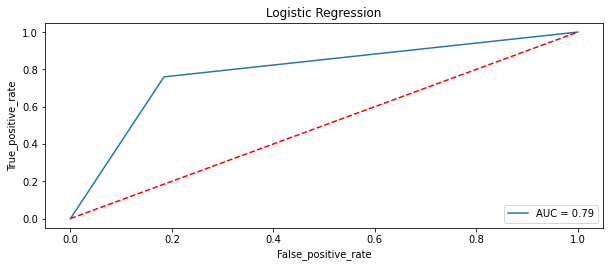

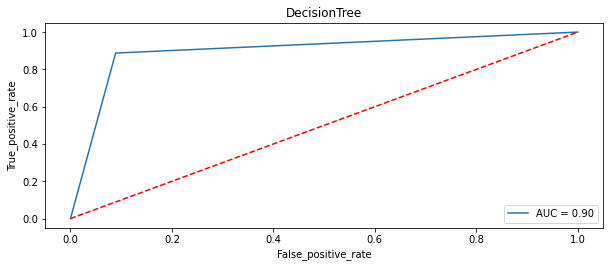

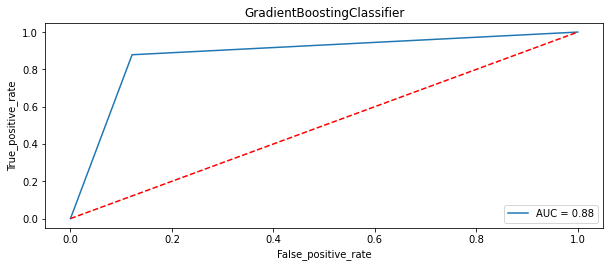

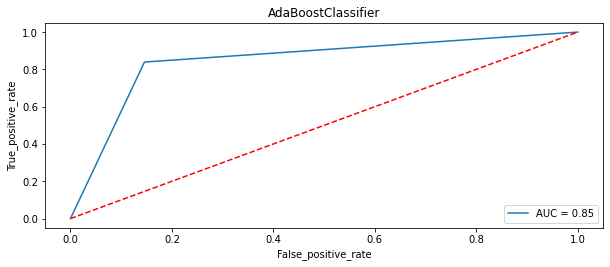

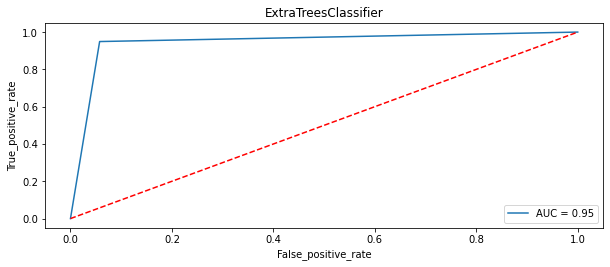

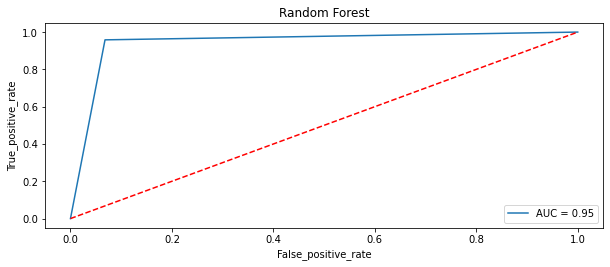

In [55]:
# Let's import metrics Library
import sklearn.metrics as metrics

#lets's create an empty list to to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
models.append(("ExtraTreesClassifier",ExtraTreesClassifier()))
models.append(("Random Forest",RandomForestClassifier()))


#let's create a function to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
logLoss = []

#Let's create a for Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix
for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
#Let's call a function which will calculate the max accuracy score for each mode and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)

#Let's create Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

    #Let's create Cross_val_score    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#Let's find Finding log_loss    
    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    print('log_loss : ', log_loss)
    logLoss.append(log_loss)

#Let's find Roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [56]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore,'log_loss':logLoss}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve,log_loss
0,Logistic Regression,78.446343,78.773284,78.493326,78.773324,7.331522
1,DecisionTree,99.994688,89.925632,89.641762,89.925615,3.479599
2,GradientBoostingClassifier,87.858871,87.851831,87.412129,87.851831,4.195878
3,AdaBoostClassifier,84.396857,84.670302,83.992610,84.670292,5.294748
4,ExtraTreesClassifier,99.995396,94.588852,94.644673,94.588857,1.868967
5,Random Forest,99.995042,94.513776,94.208962,94.513757,1.894902


#### From the above we can clearly say that Decision Tree, Extra Tree and Random Forest Classifer models are performing well.

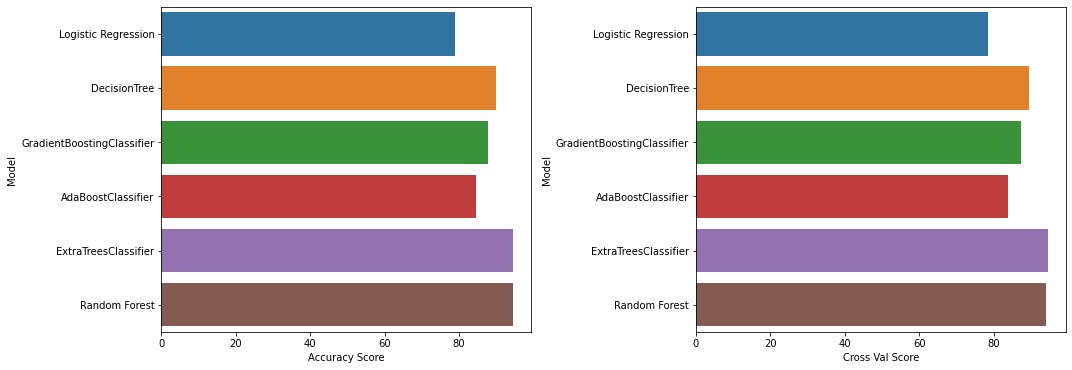

In [57]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()

In [58]:
#Let's Define a function to calculate accuracy, precision, recall and f1 score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    log_loss = metrics.log_loss(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print('log_loss : ', log_loss)

    return metric_dict

In [59]:
# Let's check the best paratmeters for GridSearch

from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [78]:
#Let's use the best parameters to tune our Random forest model

rf=RandomForestClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
0.9361540133782811


In [79]:
#Let's check the accuracy score using best parameters which calculated from gridsearchCV for Random Forest

rf=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
max_acc_score(rf,x,y)

Max Accuracy Score corresponding to Random State  48 is: 0.9446136411927191




48

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 48,test_size=0.20,stratify=y)
rf=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
rf.fit(x_train,y_train)
predet=rf.predict(x_test)
evaluate_preds(y_test,predet)

Acc: 94.45%
Precision: 0.93
Recall: 0.96
F1 score: 0.95
log_loss :  1.9174087864636258


{'accuracy': 0.94, 'precision': 0.93, 'recall': 0.96, 'f1': 0.95}

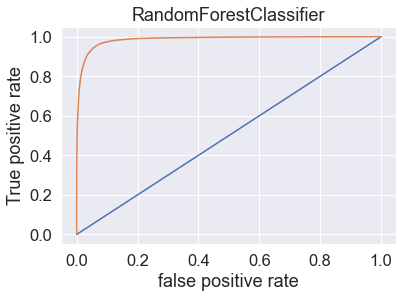

roc_auc_score =  0.9859890173628152


In [87]:
# Make predictions with probabilities
y_probs = rf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the fpr
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [62]:
#Let's cehck the best parametes using Grid Search for DecisionTreeClassifier

gs_clfD=DecisionTreeClassifier()
parameters={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
        'criterion':['gini','entropy'],
         'max_depth': range(1,20,2),
        }
grid_cv(gs_clfD,parameters,'accuracy')

Fitting 5 folds for each of 5880 candidates, totalling 29400 fits
{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 99, 'min_samples_split': 3}
0.8458583788974513


In [76]:
#Let's check theaccuracy score and roc_auc_score using best parameters which calculated from gridsearchCV

dtc =DecisionTreeClassifier(criterion= 'gini', max_depth= 11, max_leaf_nodes= 99, min_samples_split= 3)
print("DecisionTreeClassifier accuracy score:",max_acc_score(dtc,x,y))

Max Accuracy Score corresponding to Random State  90 is: 0.8552447057157022


DecisionTreeClassifier accuracy score: 90


In [64]:
#Let's cehck the best parametes using Grid Search for ExtraTreeClassifier

et=ExtraTreesClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(et,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
0.9397151501484945


In [77]:
#Let's Calclate accuracy score by inputting the best parameters from Gridsearch cv

et=ExtraTreesClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 1, max_features= 'log2',min_samples_split=4)
print("ExtraTreeClassifier accuracy score:",max_acc_score(et,x,y))

Max Accuracy Score corresponding to Random State  48 is: 0.9438203838798782


ExtraTreeClassifier accuracy score: 48


### After comparing all the moels we came to a conclusion that ExtraTreeClassifier is performing well. So we are going to choose this model and create our final model

In [66]:
#Let's Make the final model

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 44,test_size=0.20,stratify=y)
clf_et=ExtraTreesClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'log2',min_samples_split=4)
clf_et.fit(x_train,y_train)
predet=clf_et.predict(x_test)
evaluate_preds(y_test,predet)

Acc: 94.23%
Precision: 0.94
Recall: 0.95
F1 score: 0.94
log_loss :  1.9937296534793711


{'accuracy': 0.94, 'precision': 0.94, 'recall': 0.95, 'f1': 0.94}

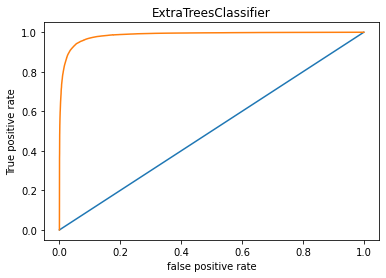

roc_auc_score =  0.9855283910856009


In [67]:
# Make predictions with probabilities
y_probs = clf_et.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the fpr
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('ExtraTreesClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[33008  2290]
 [ 1785 33512]]


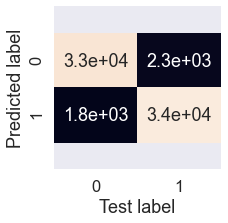

In [68]:
#Let's plot the confusion matrix

sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, predet),
                     annot=True,
                     cbar=False)
plt.xlabel("Test label")
plt.ylabel("Predicted label")
    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    

print(confusion_matrix(y_test, predet))

In [69]:
#Let's print the predicted values

test=pd.DataFrame(data=y_test,)
test['Predicted values']=predet
test

,label,Predicted values
7906,1,1
195838,1,1
191063,1,1
341289,0,0
14043,1,1
...,...,...
102145,1,1
221308,0,0
11602,1,0
310402,0,0


In [70]:
#Let's Save the Predicted values in csv file

micro_credit=pd.DataFrame(predet)
micro_credit.to_csv('Micro_Credit_Project.csv')

In [71]:
#Let's find then feature importance of our best model

clf_et.feature_importances_

array([0.0373084 , 0.1486237 , 0.03014733, 0.00545222, 0.05362126,
       0.0432999 , 0.05533295, 0.0767782 , 0.02990543, 0.08468781,
       0.04007182, 0.05235993, 0.00400625, 0.00136019, 0.05687257,
       0.00295649, 0.01188532, 0.05663595, 0.0221977 , 0.01658234,
       0.05202191, 0.05080616, 0.06708617])

In [111]:
#Let's plot the feature importance

def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    plt.figure(figsize=(20,12))
    fig, ax = plt.subplots(figsize=(20,12))
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

<Figure size 1440x864 with 0 Axes>

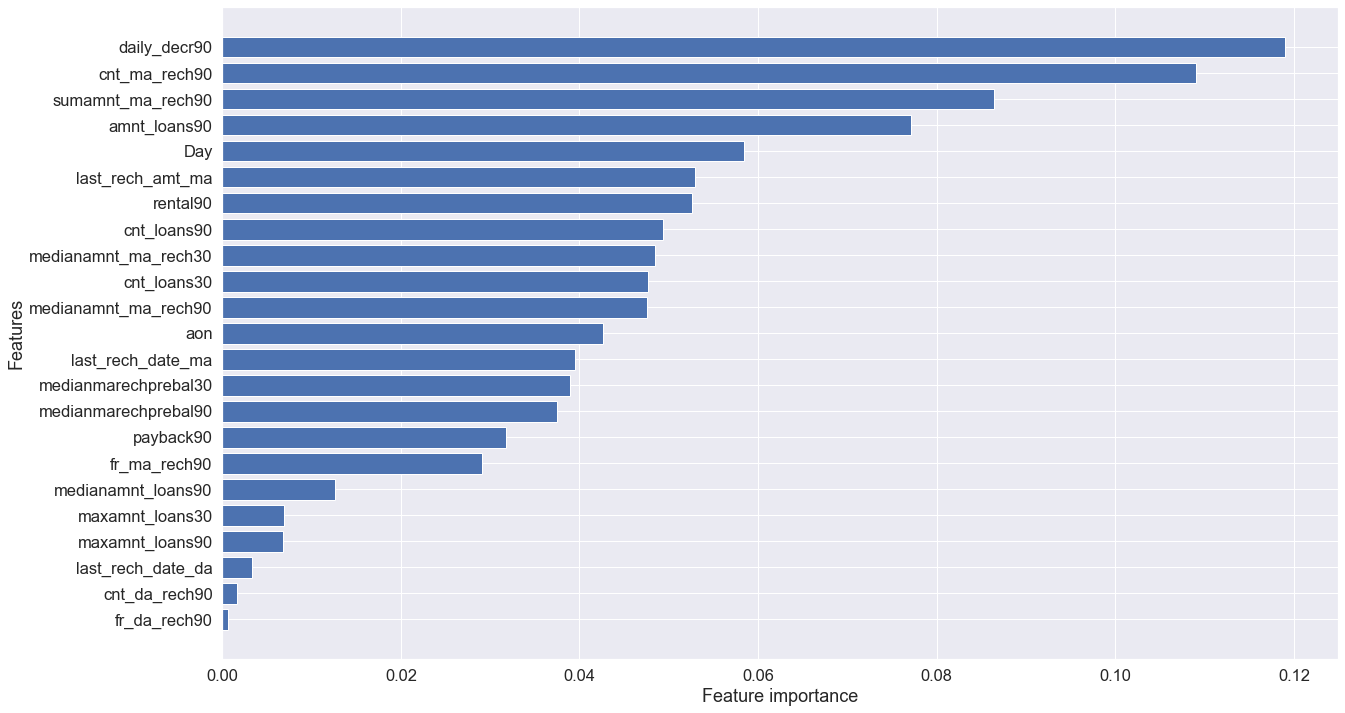

In [112]:
#Let's plot the bar plot of important features

plot_features(x_train.columns, clf_et.feature_importances_)

In [74]:
#lets save the model using joblib

import joblib
joblib.dump(clf_et,'Micro_Credit_Project.pkl')

['Micro_Credit_Project.pkl']

In [75]:
#Let's read the file using joblib

et_from_joblib=joblib.load('Micro_Credit_Project.pkl')
joblib_y_preds = et_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 94.23%
Precision: 0.94
Recall: 0.95
F1 score: 0.94
log_loss :  1.9937296534793711


{'accuracy': 0.94, 'precision': 0.94, 'recall': 0.95, 'f1': 0.94}

### Conclusion:
    
1) Around 28% users are highly defaulters with a mostly negative or null balance.

2) Users with high equilibrium and a much lower number are defaulter.

3) Nonstandard loans (i.e. 98 percent of the category) are paid to users who take up more loans as they pay back the loan within 5 days.

4) 10% to 12% of users are defaulters in the Average and Low Balance categories.

5) Non-defaulting users who have taken no loans.

6) Around 97% users are taking large loans which fall into non-default categories.

7) Defaulters include 40 percent of the users that do not have a single recharge in 3 months.

8) Around 14 percent of users fall into the category of defaulting loans, on average.

9) The default is only 40% of users who do not reload in 90 days.

10) Users who recharge very high pay their loans on time. That is, 98% of them are non-defaulting ones.

11) defaulting is 34 percent of users who reload less.

12) Old and largely non default users are trusted

13) 17% of users receiving small loans are non-performing.

14) The new users constitute 32% of the users defaulting.

15) Of users who recharge and pay their loans on time, 99 percent are more in number, which is good news for the company than for any other category.
